<a href="https://colab.research.google.com/github/jibintom/Machine-Learning-Codebasics-/blob/main/a17.%20K%20nearest%20neighbors%20classification%20with%20python%20code/K_Nearest_Neighbour_Algoritham_on_load_digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd

from sklearn.datasets import load_digits
digits=load_digits()

In [2]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [3]:
df=pd.DataFrame(digits.data)
df["target"]=digits.target
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [14]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV
clf=GridSearchCV(KNeighborsClassifier(), {
                "n_neighbors":range(1,100)
}, cv=5, return_train_score=False)

clf.fit(digits.data,digits.target)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 100)})

In [16]:
result=pd.DataFrame(clf.cv_results_)
result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001353,0.000438,0.018059,0.004058,1,{'n_neighbors': 1},0.961111,0.952778,0.966574,0.986072,0.955432,0.964393,0.011838,3
1,0.001016,0.000110,0.017008,0.000346,2,{'n_neighbors': 2},0.961111,0.966667,0.969359,0.977716,0.961003,0.967171,0.006181,1
2,0.001005,0.000011,0.018478,0.000279,3,{'n_neighbors': 3},0.955556,0.958333,0.966574,0.986072,0.966574,0.966622,0.010672,2
3,0.000868,0.000090,0.019724,0.000570,4,{'n_neighbors': 4},0.947222,0.958333,0.966574,0.980501,0.966574,0.963841,0.010946,4
4,0.000833,0.000022,0.019960,0.000722,5,{'n_neighbors': 5},0.947222,0.955556,0.966574,0.980501,0.963788,0.962728,0.011169,5


In [17]:
result[["param_n_neighbors","mean_test_score"]]

,param_n_neighbors,mean_test_score
0,1,0.964393
1,2,0.967171
2,3,0.966622
3,4,0.963841
4,5,0.962728
...,...,...
94,95,0.900952
95,96,0.901510
96,97,0.899839
97,98,0.898725


In [19]:
clf.best_score_

0.9671711544413494

In [20]:
clf.best_params_

{'n_neighbors': 2}

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(digits.data, digits.target, test_size=10)

In [22]:
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train,y_train)
knn.score(x_test,y_test)


1.0

In [23]:
y_pred=knn.predict(x_test)

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
cm

array([[1, 0, 0, 0, 0, 0, 0],
       [0, 2, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 2, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 2]])

Text(42.0, 0.5, 'Truth')

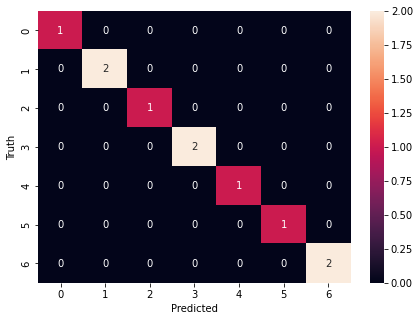

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sn

plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         2

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

